In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

# Previsão de  Preços de Opções na Bolsa de Valores
## Trabalho 1 – Análise Exploratória

#### Bruno Silva RA: 091585
#### Denise Leite RA: 183137
#### Milena Rocha RA: 183146

In [1]:
# Importing Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing File
file = '../input/COTAHIST_A2009_to_A2018P.csv'
df = pd.read_csv(file)
df.head(10)

,Unnamed: 0,TIPREG,DATPRE,CODBDI,CODNEG,TPMERC,NOMRES,ESPECI,PRAZOT,MODREF,PREABE,PREMAX,PREMIN,PREMED,PREULT,PREOFC,PREOFV,TOTNEG,QUATOT,VOLTOT,PREEXE,INDOPC,DATVEN,FATCOT,PTOEXE,CODISI,DISMES
0,0,1,2017-01-02,2,AALR3,10,ALLIAR,ON NM,NaN,R$,14.62,14.88,14.40,14.58,14.60,14.60,14.73,87,35900,52350500,0,0,9999-12-31 00:00:00,1,0,BRAALRACNOR6,100
1,1,1,2017-01-02,10,ABCB2,10,ABC BRASIL,DIR PRE N2,NaN,R$,2.85,2.85,2.85,2.85,2.85,2.00,0.00,1,200,57000,0,0,9999-12-31 00:00:00,1,0,BRABCBD10PR0,126
2,2,1,2017-01-02,2,ABCB4,10,ABC BRASIL,PN EJS N2,NaN,R$,13.40,13.52,13.08,13.30,13.31,13.31,13.34,998,195800,260557000,0,0,9999-12-31 00:00:00,1,0,BRABCBACNPR4,127
3,3,1,2017-01-02,96,ABCB4F,20,ABC BRASIL,PN EJS N2,NaN,R$,13.45,13.48,13.15,13.29,13.26,13.26,13.48,20,582,773943,0,0,9999-12-31 00:00:00,1,0,BRABCBACNPR4,127
4,4,1,2017-01-02,12,ABCP11,10,FII ABC IMOB,CI ER,NaN,R$,11.83,11.83,11.01,11.62,11.36,11.38,12.05,19,1210,1407143,0,0,9999-12-31 00:00:00,1,0,BRABCPCTF000,255
5,5,1,2017-01-02,2,ABEV3,10,AMBEV S/A,ON EJ,NaN,R$,16.34,16.66,16.26,16.42,16.31,16.31,16.36,9421,4265400,7004006700,0,0,9999-12-31 00:00:00,1,0,BRABEVACNOR1,115
6,6,1,2017-01-02,96,ABEV3F,20,AMBEV S/A,ON EJ,NaN,R$,16.41,16.66,16.27,16.45,16.60,16.33,16.60,506,8965,14753680,0,0,9999-12-31 00:00:00,1,0,BRABEVACNOR1,115
7,7,1,2017-01-02,62,ABEV3T,30,AMBEV S/A,ON EJ,16.0,R$,16.55,16.56,16.49,16.53,16.50,0.00,0.00,6,1300,2149105,0,0,9999-12-31 00:00:00,1,0,BRABEVACNOR1,115
8,8,1,2017-01-02,62,ABEV3T,30,AMBEV S/A,ON EJ,45.0,R$,16.56,16.57,16.56,16.56,16.57,0.00,0.00,2,300,496824,0,0,9999-12-31 00:00:00,1,0,BRABEVACNOR1,115
9,9,1,2017-01-02,62,ABEV3T,30,AMBEV S/A,ON EJ,60.0,R$,16.91,16.94,16.91,16.92,16.94,0.00,0.00,4,6000,10157990,0,0,9999-12-31 00:00:00,1,0,BRABEVACNOR1,115


## VALIDAÇÃO DE VARIÁVEL - DATVEN

In [3]:
mask_mercado_normal = ((df['TPMERC'] != 12) & (df['TPMERC'] != 13) & (df['TPMERC'] != 70) & (df['TPMERC'] != 80))
mask_mercado_opcao = ((df['TPMERC'] == 12) & (df['TPMERC'] == 13) & (df['TPMERC'] == 70) & (df['TPMERC'] == 80))

print(
df[(mask_mercado_normal) & (df['DATVEN'] == '9999-12-31 00:00:00')]['DATVEN'].value_counts(),
df[(mask_mercado_opcao) & (df['DATVEN'] == '9999-12-31 00:00:00')]['DATVEN'].value_counts())

9999-12-31 00:00:00    1919685
Name: DATVEN, dtype: int64 Series([], Name: DATVEN, dtype: int64)


## CLASSIFICAÇÃO DAS VARIÁVEIS

In [4]:
VARIAVEIS = [["TIPREG", "Quantitativa Discreta", "Tipo de Registro, sempre 1"],["DATPRE","Quantitativa Discreta", "Data de realização do pregão"],["CDOBDI", "Qualitativa Nominal", "Código de classificação do tipo do papel emitido"],
            ["CODNEG", "Qualitativa Nominal", "Código da Negociação"],["TPMERC","Qualitativa Nominal", "Código do mercado em que o papel está cadastrado"],["NOMRES","Qualitativa Nominal", "Nome resumido da empresa emissora do papel"],
            ["ESPECI", "Qualitativa Nominal", "Especificação do tipo de papel"],["PRAZOT","Quantitativa Discreta", "Prazo em dias do mercado a termo"],["MODREF","Qualitativa Nominal", "Moeda de referência"],
            ["PREABE", "Quantitativa Contínua", "Preço de abertura do papel no pregão"],["PREMAX","Quantitativa Contínua", "Preço máximo do papel no pregão"],["PREMIN","Quantitativa Contínua", "Preço mínimo do papel no pregão"],
            ["PREMED", "Quantitativa Contínua", "Preço médio do papel no pregão"],["PREULT","Quantitativa Contínua", "Preço do papel no fechamento do pregão"],["PREOFC","Quantitativa Contínua", "Preço da melhor oferta de compra pelo papel no mercado"],
            ["PREOFV", "Quantitativa Contínua", "Preço da melhor oferta de venda no mercado"],["TOTNEG","Quantitativa Discreta", "Total de negociações realizadas com o papel no pregão"],["QUATOT","Quantitativa Discreta", "Quantidade de títulos negociados nesse papel no mercado"],
            ["VOLTOT", "Quantitativa Discreta", "Volume total de titulos negociados nesse papel no mercado"],["PREEXE","Quantitativa Contínua", "Preço de exercício para o mercado de opções ou de termo secundario"],["INDOPC","Qualitativa Nominal", "Indicador de correção de preços de exercícios ou valores de contrato para os mercados de opções ou termo de secundário"],
            ["DATVEN", "Quantitativa Discreta", "Data de vencimento para os mercados de opções e de termo secundário"],["FATCOT", "Quantitativa Discreta", "Fator de cotação do papel"],["PTOEXE","Quantitativa Discreta", "Preço de exercício em pontos para opções referenciadas em dólar ou valor de contrato em pontos para termo secúndario"],
           ["CODISI", "Qualitativa Nominal", "Código do papel no sistema ISIN ou código interno do papel"],["DISMES","Quantitativa Discreta", "Número de distribuição do papel"]] 
DF_VARIAV = pd.DataFrame(VARIAVEIS, columns=["Variavel", "Classificação", "Descrição"])
DF_VARIAV

,Variavel,Classificação,Descrição
0,TIPREG,Quantitativa Discreta,"Tipo de Registro, sempre 1"
1,DATPRE,Quantitativa Discreta,Data de realização do pregão
2,CDOBDI,Qualitativa Nominal,Código de classificação do tipo do papel emitido
3,CODNEG,Qualitativa Nominal,Código da Negociação
4,TPMERC,Qualitativa Nominal,Código do mercado em que o papel está cadastrado
5,NOMRES,Qualitativa Nominal,Nome resumido da empresa emissora do papel
6,ESPECI,Qualitativa Nominal,Especificação do tipo de papel
7,PRAZOT,Quantitativa Discreta,Prazo em dias do mercado a termo
8,MODREF,Qualitativa Nominal,Moeda de referência
9,PREABE,Quantitativa Contínua,Preço de abertura do papel no pregão


In [5]:
#linhas e colunas
n_lin = len(df.index)
n_col = len(df.columns)

print('Linhas',n_lin,'Colunas', n_col)

Linhas 3357400 Colunas 27


In [6]:
# Tipo Colunas
df.dtypes

Unnamed: 0      int64
TIPREG          int64
DATPRE         object
CODBDI          int64
CODNEG         object
TPMERC          int64
NOMRES         object
ESPECI         object
PRAZOT        float64
MODREF         object
PREABE        float64
PREMAX        float64
PREMIN        float64
PREMED        float64
PREULT        float64
PREOFC        float64
PREOFV        float64
TOTNEG          int64
QUATOT          int64
VOLTOT          int64
PREEXE          int64
INDOPC          int64
DATVEN         object
FATCOT          int64
PTOEXE          int64
CODISI         object
DISMES          int64
dtype: object

In [7]:
#Quais e quantos dados são faltante
nan_values = df.isna().sum()
nan_values[nan_values > 0]

PRAZOT    1502880
dtype: int64

In [8]:
#Data de Vencimento - Variação de 31/12/999 pelo total
num_reg = (df.groupby(['DATVEN']).size().max()/n_lin) * 100
#df.groupby(['DATVEN']).size().sort_values(ascending=False).head(1)
num_reg

57.17772681241436

#1 – Observe os dados inconsistentes. Quais campos possuem registros faltantes? (Zero, vazio,
#negativo, NaN, etc). Quais possuem valores fora da faixa esperada? (ex: em um dataset com
#dados de pessoas, há registros de altura maior que 2,5m?). Qual a proporção em relação aos
#dados corretos? Para cada uma das campos com dados faltantes, qual sua proposta para
#tratar os dados? (ex: pretende preencher de alguma forma? Se sim, como?)

'''
  - A coluna 0 unamed, é um indice da extração do arquivo.Pode ser eliminado.
  - O campo PrazoOT está sem valores. Este é o PRAZO EM DIAS DO MERCADO A TERMO. Como vamos trabalhar com o histórico de preço das 
  opções, acredito que este campo possa ser descartado
  - O campo Data de Vencimento, também, possui valores 'incompletos' -31/12/9999 - que representam 57% do
  total de linhas,e é a data de vencimento para os mercados de opção e termo secundário.
  Como apenas os papéis negociados no mercado secundário e no mercado de opções tem data de vencimento, 
  ao aplicarmos filtros destinados para esses mercados não teremos retorno dessa data inválida, não sendo 
  necessário por hora nenhum tipo de tratamento.
'''

#2 – Liste as principais dúvidas sobre os dados (pelo menos 5). Seja específico e faça perguntas
#que possam te ajudar a escolher quais campos serão úteis e podem te ajudar a ter ideias de
#como montar sua solução no futuro. Também faça perguntas que te ajudem a identificar
#campos irrelevantes e que devem ser descartadas no futuro. Questões simples como “Qual a
#média/variância/desvio padrão do campo X?” não serão aceitas, mas perceba que pode ser
#interessante realizar esses cálculos para ter respostas de questões mais elaboradas. Você
#também pode elaborar uma questão como essa, desde faça esses cálculos para todos os
#campos, por exemplo: “Qual é a média, variância e desvio padrão de cada campo numérico do
#dataset?” 

'''
  1) Qual o número de transações,por ano, no mercado de opções?
  2) Dessas transações, quantas são compra ? quantas são venda?
  3) Quais as 5 ações mais negociadas? 
  4) Qual o preço médio do PREÇO DE EXERCÍCIO PARA O MERCADO DE OPÇÕES por ano?
  5) Qual o volume de papel negociado nos mercados de
      - EXERCÍCIO DE OPÇÕES DE COMPRA
      - EXERCÍCIO DE OPÇÕES DE VENDA
      - OPÇÕES DE COMPRA
      - OPÇÕES DE VENDA
'''

#3 – Plote gráficos para responder às questões levantadas acima. Escolha os gráficos mais
#adequados para cada questão. Seja convincente e didático: pense que o observador pode não
#entender sobre o problema, como convencê-lo das suas afirmações? Capriche na
#apresentação! Faça uso de cores, legendas e outros recursos que deixem os gráficos
#visualmente agradáveis.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


ANO
2009     43432
2010     56641
2011     79320
2012    122378
2013    169268
2014    192518
2015    221485
2016    263148
2017    269645
2018     19880
dtype: int64


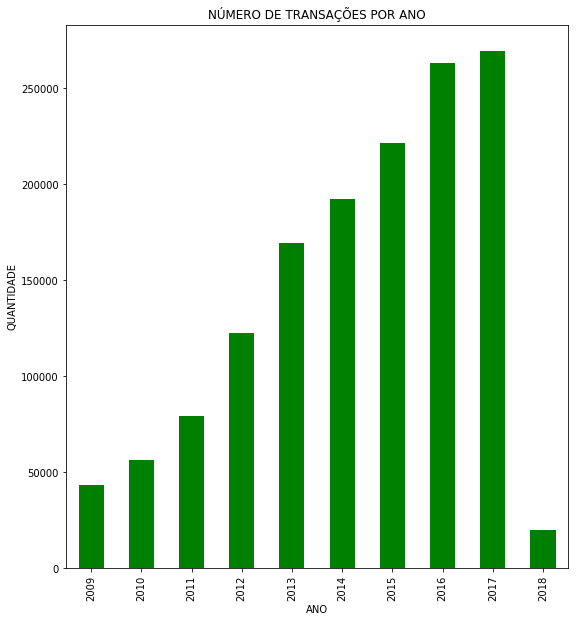

In [10]:
#1) Qual o número de transações,por ano, no mercado de opções?
#Mercados
#012 EXERCÍCIO DE OPÇÕES DE COMPRA
#013 EXERCÍCIO DE OPÇÕES DE VENDA
#070 OPÇÕES DE COMPRA
#080 OPÇÕES DE VENDA

stg = df[['DATPRE','TPMERC']]
stg['ANO'] = pd.to_datetime(stg.DATPRE).dt.year
mask = ((stg['TPMERC'] == 12) | (stg['TPMERC'] == 13) | (stg['TPMERC'] == 70) | (stg['TPMERC'] == 80))

by_year = stg[mask]
by_year = by_year.groupby(['ANO']).size()

by_year.plot(kind = 'bar', color='green',figsize=(9,10),grid = False)

plt.xticks(rotation='90')
plt.title('NÚMERO DE TRANSAÇÕES POR ANO')
plt.xlabel('ANO')
plt.ylabel('QUANTIDADE')
print(by_year)
plt.show()

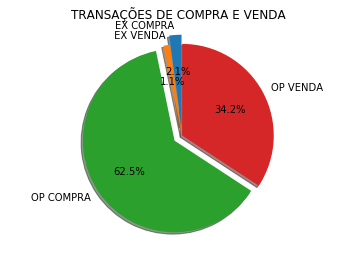

In [11]:
# 2) Dessas transações, quantas são compra ? quantas são venda?

by_market = stg[mask]
by_market = by_market.groupby(['TPMERC']).size()
#by_market.head(5)

label = ['EX COMPRA',' EX VENDA','OP COMPRA','OP VENDA']
explode = (0.1, 0.0, 0.1,0.0)
fig1, ax1 = plt.subplots()
ax1.pie(by_market,explode = explode,labels = label, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('TRANSAÇÕES DE COMPRA E VENDA')
ax1.axis('equal')
plt.show()

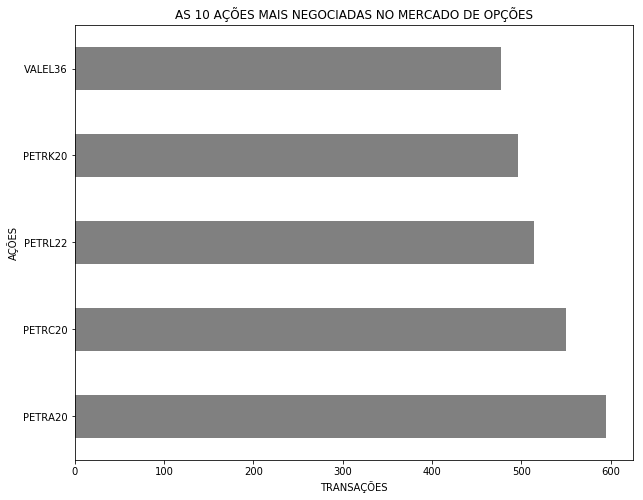

In [12]:
#3) Quais as 10 ações mais negociadas no mercado de opções? 
stg = df[['CODNEG','TPMERC']]
mask = ((stg['TPMERC'] == 12) | (stg['TPMERC'] == 13) | (stg['TPMERC'] == 70) | (stg['TPMERC'] == 80))

by_cod = stg[mask]
by_cod = by_cod.groupby('CODNEG').size().sort_values(ascending=False)
by_cod = by_cod.head(5)

by_cod.plot(kind = 'barh', color='gray',figsize=(10,8),grid = False)

plt.title('AS 10 AÇÕES MAIS NEGOCIADAS NO MERCADO DE OPÇÕES')
plt.xlabel('TRANSAÇÕES')
plt.ylabel('AÇÕES')
plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


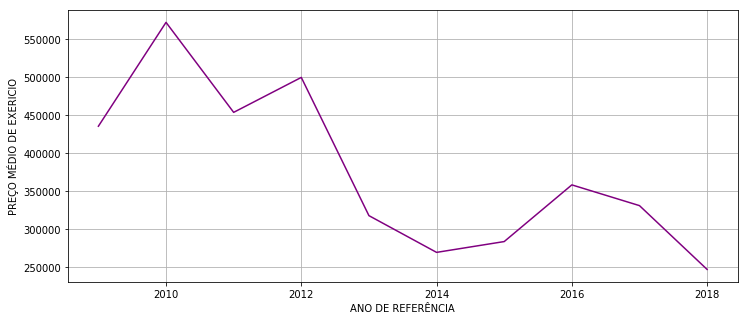

In [13]:
#4) Qual o preço médio das ações no mercado de opções por ano?
stg = df[['CODNEG','TPMERC','PREEXE','DATPRE']]
mask = ((stg['TPMERC'] == 12) | (stg['TPMERC'] == 13) | (stg['TPMERC'] == 70) | (stg['TPMERC'] == 80))
stg['ANO'] = pd.to_datetime(stg.DATPRE).dt.year

by_price = stg[mask]
by_price = by_price.groupby('ANO')['PREEXE'].mean().round(2)

by_price.plot(color = 'purple',figsize=(12,5),grid = True)

plt.xlabel('ANO DE REFERÊNCIA')
plt.ylabel('PREÇO MÉDIO DE EXERICIO')
plt.show()

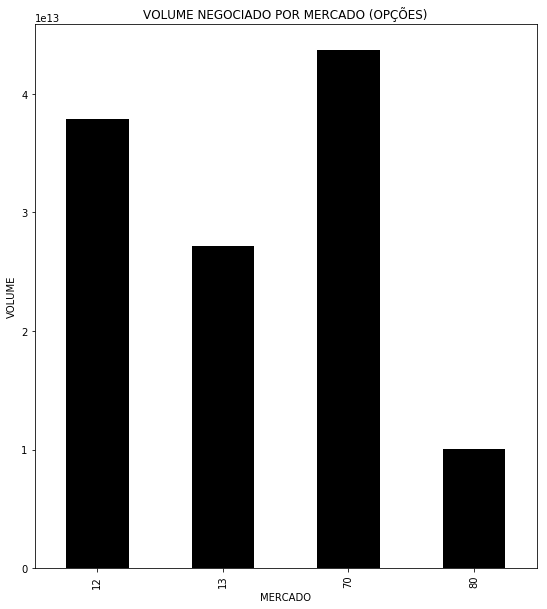

In [14]:
#5) Qual o volume de papel negociado nos mercados de opções?
      #- EXERCÍCIO DE OPÇÕES DE COMPRA
      #- EXERCÍCIO DE OPÇÕES DE VENDA
      #- OPÇÕES DE COMPRA
      #- OPÇÕES DE VENDA
        
stg = df[['TPMERC','VOLTOT']]
mask = ((stg['TPMERC'] == 12) | (stg['TPMERC'] == 13) | (stg['TPMERC'] == 70) | (stg['TPMERC'] == 80))


by_vol = stg[mask]
by_vol = by_vol.groupby('TPMERC')['VOLTOT'].sum()

label = ['EX COMPRA',' EX VENDA','OP COMPRA','OP VENDA']

by_vol.plot(kind = 'bar', color='black',figsize=(9,10),grid = False)

plt.xticks(rotation='90')
plt.title('VOLUME NEGOCIADO POR MERCADO (OPÇÕES)')
plt.xlabel('MERCADO')
plt.ylabel('VOLUME')
plt.show()


In [15]:
#4 – Para cada uma das questões que você elaborou no exercício 2, escreva uma breve
#conclusão após as observações feitas no exercício 3. Seja realista, tome suas conclusões com
#base nos dados e tome cuidado para não fazer afirmações difíceis de serem suportadas pelas
#suas análises

#1) Qual o número de transações,por ano, no mercado de opções?
Podemos perceber que o crescimento do mercado de opções foi gradiente, porém com um aumento bem expressivo a partir
do ano de 2013 e um auge significativo em 2017. Isso nos leva a crer , que , o mercado de opções tem sido uma opção
muito rentavel e atraente para os investidores.O ano de 2018 não possui dados atualizados.

#2) Dessas transações, quantas são compra ? quantas são venda?
A maior parte das transações do mercado de opções são referentes a compra e venda dos "sinais" de opção.
Uma parcela muito pequena dessas transações são referentes a execução do sinal, ou seja, a compra ou venda da ação
de fato. Isso, em uma análise posterior, é interessante, pois, ou esses títulos ainda não venceram, ou,
poucas negociações foram executadas.

#3) Quais as 10 ações mais negociadas no mercado de opções? 
Das 5 ações mais negociadas no mercado de opções, 4 delas pertencem a Petrobras e uma a Vale.
Diante deste cenário, é possível presumir que estas ações serão as que terão uma maior valorização no 
mercado de opções.

#4) Qual o preço médio de execução das ações no mercado de opções?
O preço de exericio, é o preço acordado entre o comprador e o vendedor da opção. Não é o preço de sinal da opção,
mas sim, o preço que será negociado, caso, no final do prazo a execução da opção seja feita.
Olhando para o grafico, podemos ver, uma preço negociado em queda, o que indica também, uma queda no valor de mercado
da ação. No detalhe, poderiamos analisar, se, devido essa queda do preço de execução, o preço médiio da opção 
teve valorização.

#5) Qual o volume de papel negociado nos mercados de opções?
Neste gráfico, podemos observar que, apesar do número pequeno de transações de execução de compra, o seu volume
negociado, ou seja, a quantidade de sinais de ação comprados é maior.


SyntaxError: invalid syntax (<ipython-input-15-040c5708b374>, line 7)